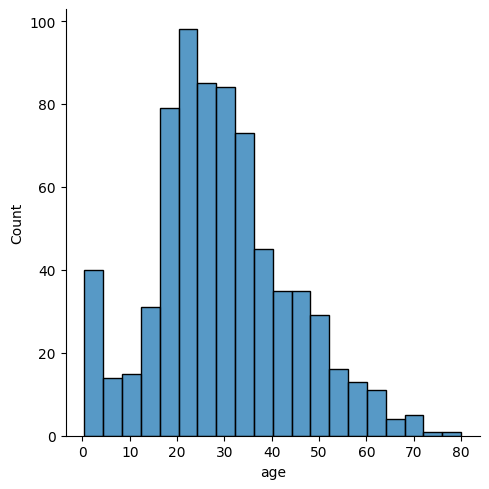

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()
# | index | survived | pclass | sex    | age  | sibSp | parch | fare  | embarked | class | who   | adult_male | deck | embark_town | alive | alone |
# | ----- | -------- | ------ | ------ | ---- | ----- | ----- | ----- | -------- | ----- | ----- | ---------- | ---- | ----------- | ----- | ----- |
# | 0     | 0        | 3      | male   | 22.0 | 1     | 0     | 7.25  | S        | Third | man   | True       | NaN  | Southampton | no    | False |
# | 1     | 1        | 1      | female | 38.0 | 1     | 0     | 71.28 | C        | First | woman | False      | C    | Cherbourg   | yes   | False |
# | 2     | 1        | 3      | female | 26.0 | 0     | 0     | 7.93  | S        | Third | woman | False      | NaN  | Southampton | yes   | True  |
# | 3     | 1        | 1      | female | 35.0 | 1     | 0     | 53.10 | S        | First | woman | False      | C    | Southampton | yes   | False |
# | 4     | 0        | 3      | male   | 35.0 | 0     | 0     | 8.05  | S        | Third | man   | True       | NaN  | Southampton | no    | True  |

#🔎 Check for Missing Values
df.isnull().head() 
# where the values are True, the data is missing

# | Index | survived | pclass | sex   | age   | sibsp | parch | fare  | embarked | class | who   | adult\_male | deck     | embark\_town | alive | alone |
# | ----- | -------- | ------ | ----- | ----- | ----- | ----- | ----- | -------- | ----- | ----- | ----------- | -------- | ------------ | ----- | ----- |
# | 0     | False    | False  | False | False | False | False | False | False    | False | False | False       | **True** | False        | False | False |
# | 1     | False    | False  | False | False | False | False | False | False    | False | False | False       | False    | False        | False | False |
# | 2     | False    | False  | False | False | False | False | False | False    | False | False | False       | **True** | False        | False | False |
# | 3     | False    | False  | False | False | False | False | False | False    | False | False | False       | False    | False        | False | False |
# | 4     | False    | False  | False | False | False | False | False | False    | False | False | False       | **True** | False        | False | False |

df.isnull().sum()
# survived         0
# pclass           0
# sex              0
# age            177
# sibsp            0
# parch            0
# fare             0
# embarked         2
# class            0
# who              0
# adult_male       0
# deck           688
# embark_town      2
# alive            0
# alone            0

# this show the number of missing values in each column

# ❌ Method 1: Drop Missing Values
     #🔹 Drop Rows with Missing Values:
df.shape
# (891, 15)
# if there any missing values, the row will be dropped
df.dropna().shape
# (182, 15)
# this droping data is bad because it removes a lot of data

     #🔹 Drop Columns with Missing Values:
df.dropna(axis=1, inplace=False)
# ✅ You can use this only if many values are missing in the column (e.g., column deck).

# 🟠 1. Mean Imputation (for numerical data)
# 📌 Replace missing values with the mean of the column.
sns.displot(df['age'])





In [ ]:
df['Age_mean'] = df['age'].fillna(df['age'].mean()) # replace missing values with the mean
df['Age_mean'].isnull().sum()  # Check if there are still missing values
# 0
df[['Age_mean', 'age']] # Show the first few rows of the new column
# | Index | Age_mean | age  |
# | ----- | ----------- | ---- |
# | 0     | 22.0        | 22.0 |
# | 1     | 38.0        | 38.0 |
# | 2     | 26.0        | 26.0 |
# | 3     | 35.0        | 35.0 |
# | 4     | 35.0        | 35.0 |
#  888	   29.699118	  NaN

# NaN value is replaced with the mean of the column.

# 🟡 2. Median Imputation (for numerical data with outliers)- If we had ouitlier in dataset
df['Age_median'] = df['age'].fillna(df['age'].mean()) # replace missing values with the mean
df['Age_median'].isnull().sum()  # Check if there are still missing values
# 0
df[['Age_mean','Age_median', 'age']] # Show the first few rows of the new column
# | Index | Age (Mean Imputed) | Age (Median Imputed) | Original Age |
# | ----- | ------------------ | -------------------- | ------------ |
# | 0     | 22.0               | 22.0                 | 22.0         |
# | 1     | 38.0               | 38.0                 | 38.0         |
# | 2     | 26.0               | 26.0                 | 26.0         |
# | 3     | 35.0               | 35.0                 | 35.0         |
# | 4     | 35.0               | 35.0                 | 35.0         |
#  888	   29.699118	         29.699118	             NaN


# 🟢 3. Mode Imputation (for categorical data)
df['embarked'].isnull().sum() # Check missing values in 'embarked'
# 2 
df[df['embarked'].isnull()]
# | Index | survived | pclass | sex    | age  | sibsp | parch | fare | embarked | class | who   | adult_male | deck | embark_town | alive | alone | age (Median) | age (Mean) |
# | ----- | -------- | ------ | ------ | ---- | ----- | ----- | ---- | -------- | ----- | ----- | ---------- | ---- | ----------- | ----- | ----- | ------------ | ---------- |
# | 61    | 1        | 1      | female | 38.0 | 0     | 0     | 80.0 | NaN      | First | woman | False      | B    | NaN         | yes   | True  | 38.0         | 38.0       |
# | 829   | 1        | 1      | female | 62.0 | 0     | 0     | 80.0 | NaN      | First | woman | False      | B    | NaN         | yes   | True  | 62.0         | 62.0       |

#




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0
